In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/tongzhu/python_projects/lego/lego_sets.csv')
theme = pd.read_csv('/Users/tongzhu/python_projects/lego/parent_themes.csv')

In [3]:
df.head(10)

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
5,0014-1,Space Mini-Figures,1979,12.0,Supplemental,Space
6,0015-1,Space Mini-Figures,1979,NaN,Supplemental,Space
7,0016-1,Castle Mini Figures,1978,NaN,Castle,Castle
8,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland
9,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland


In [4]:
theme.head(10)

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False
5,147,Pirates,False
6,155,Modular Buildings,False
7,158,Star Wars,True
8,186,Castle,False
9,204,Designer Sets,False


In [5]:
merged = pd.merge(df, theme, left_on='parent_theme', right_on='name')  # inner joined the two datasets
merged = merged.drop(columns='name_y')  # dropped column 'name_y' since it has the same content as column 'parent_theme'
merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [6]:
licensed = merged.query('is_licensed')  # return all columns where 'is_licensed' is True
# licensed = merged[merged['is_licensed']]  will do the same
# ------------------------------------------------------------------
# licensed = merged.query('~is_licensed')  will do the opposite
# licensed = merged[~merged['is_licensed']]  will do the opposite

licensed.head(10)

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True
3498,10129-1,Rebel Snowspeeder - UCS,2003,1456.0,Star Wars Episode 4/5/6,Star Wars,158,True
3499,10131-1,TIE Fighter Collection,2004,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3500,10134-1,Y-wing Attack Starfighter - UCS,2004,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3501,10143-1,Death Star II,2005,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3502,10144-1,Sandcrawler,2005,1679.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [7]:
star_wars = licensed.query('parent_theme=="Star Wars"') # return all columns where 'parent_theme' is 'Star Wars'
star_wars.head(10)

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True
3498,10129-1,Rebel Snowspeeder - UCS,2003,1456.0,Star Wars Episode 4/5/6,Star Wars,158,True
3499,10131-1,TIE Fighter Collection,2004,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3500,10134-1,Y-wing Attack Starfighter - UCS,2004,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3501,10143-1,Death Star II,2005,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3502,10144-1,Sandcrawler,2005,1679.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [8]:
star_wars.shape  # a good way to see the (# rows, # columns) of the data frame
# star_wars.shape[0] will extract the value 609 from the pair

(609, 8)

Question \#1: What percentage of all licensed sets ever released were Star Wars themed?<br>
(save the answer as a variable 'the_force' in the form of an interger)

In [10]:
licensed = licensed.dropna(subset='set_num')  # only dropna for the column 'set_num'
the_force = int(star_wars.shape[0] / licensed.shape[0] * 100)
print(the_force)  # answer for the question

51


Question \#2: In which year was Star War not the most popular licensed theme?<br>
(save the answer as a variable 'new_era' in the form of an interger)

In [11]:
licensed['count'] = 1  # create a column 'count' filled with 1s

summed_df = licensed.groupby(['year','parent_theme']).sum().reset_index()  # grouped the dataset by 'year' and 'parent_theme'
# it is always a good idea to reset_index() after groupby otherwise we will lose the index column

summed_df.head(10)

,year,parent_theme,num_parts,id,is_licensed,count
0,1999,Star Wars,1384.0,2054,13,13
1,2000,Disney's Mickey Mouse,405.0,1940,5,5
2,2000,Star Wars,2580.0,4108,26,26
3,2001,Harry Potter,1284.0,2706,11,11
4,2001,Star Wars,2949.0,2212,14,14
5,2002,Harry Potter,1397.0,4674,19,19
6,2002,Star Wars,4735.0,4424,28,28
7,2002,Super Heroes,333.0,1446,3,3
8,2003,Harry Potter,0.0,738,3,3
9,2003,Star Wars,6660.0,5056,32,32


In [12]:
# sorted the above data frame by 'count' in descending order(from top to bottom: big number to small number)
# then drop the duplicated years(it will only keep the max 'count' for each year)
max_df = summed_df.sort_values('count', ascending=False).drop_duplicates('year')

# make the result more readable
max_df = max_df.sort_values('year')
max_df[['year','parent_theme']]

,year,parent_theme
0,1999,Star Wars
2,2000,Star Wars
4,2001,Star Wars
6,2002,Star Wars
9,2003,Star Wars
12,2004,Star Wars
16,2005,Star Wars
20,2006,Star Wars
24,2007,Star Wars
28,2008,Star Wars


In [13]:
new_era = 2017

Bonus question: Break down number of sets by year?

In [14]:
clean_df = merged[~merged['set_num'].isna()]
clean_df['count'] = 1
sets_per_year = clean_df.groupby('year').sum().reset_index()[['year','count']]
# use a loop of the rows to print the entire data frame
for i,j in sets_per_year.iterrows():
    print(j['year'] ,j['count'])

1950 7
1953 4
1954 14
1955 28
1956 12
1957 21
1958 42
1959 4
1960 3
1961 17
1962 40
1963 18
1964 11
1965 10
1966 89
1967 21
1968 25
1969 69
1970 29
1971 45
1972 38
1973 68
1974 39
1975 31
1976 68
1977 92
1978 73
1979 82
1980 88
1981 79
1982 76
1983 57
1984 76
1985 139
1986 123
1987 209
1988 68
1989 114
1990 85
1991 106
1992 115
1993 111
1994 128
1995 128
1996 144
1997 194
1998 325
1999 300
2000 327
2001 339
2002 447
2003 415
2004 371
2005 330
2006 283
2007 319
2008 349
2009 403
2010 444
2011 502
2012 615
2013 593
2014 715
2015 670
2016 608
2017 438


/var/folders/86/k4z0qv9176vg6q0g2cxwgkmm0000gn/T/ipykernel_44539/2050116533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['count'] = 1


In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

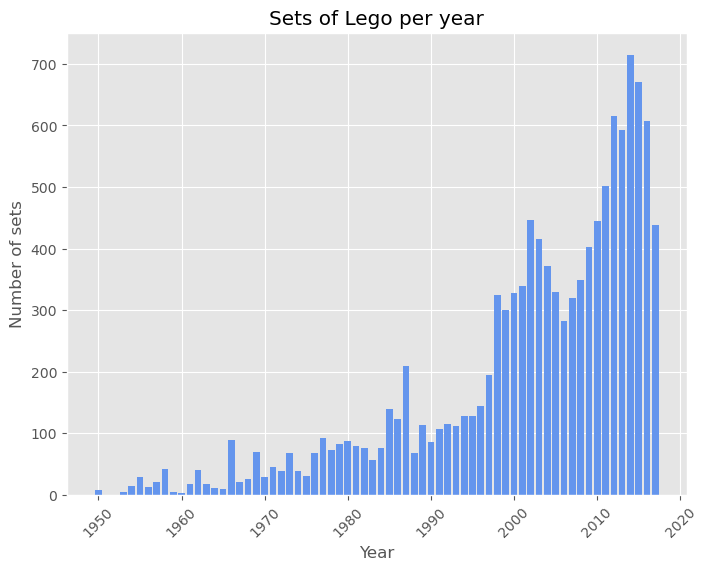

In [16]:
plt.figure(figsize=(8,6))
plt.bar(sets_per_year['year'], sets_per_year['count'], color='cornflowerblue')
plt.title('Sets of Lego per year')
plt.xlabel('Year')
plt.ylabel('Number of sets')
plt.xticks(rotation=45)
plt.show()